In [123]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Reparameterisation of Gibbs free energy: explanation

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from common import set_theme
from synbio_morpher.utils.modelling.physical import equilibrium_constant_reparameterisation, gibbs_K_cal, eqconstant_to_rates
from synbio_morpher.utils.misc.units import per_mol_to_per_molecule

set_theme()

top_dir = os.path.join('figures', '02_reparameterisation')

In [125]:
E = np.arange(-60, 0, 0.1)
y0 = np.array([100])
k_f_Ms = 1000000
k_f = per_mol_to_per_molecule(k_f_Ms)
# chosen_points = np.array([[-3, -10, -22, -37], [1, 0.5, 0.1, 0.01]])
# chosen_points = np.array([[-3, -10, -15, -22, -29, -40], [1, 0.7, 0.31622777, 0.1, 0.03162278, 0.01]])
chosen_points = np.array([[-31, -23, -20, -18, -13, -10, -7], [0.01, 0.045, 0.105, 0.2, 0.45, 0.5, 1.0]])


def take_inverse(K_eq):
    return 1 / (1 + K_eq)

def take_inverse2(K_eq):
    return 1 / K_eq

def take_inverse_leaky(K_eq):
    leak = 0.01
    return (1 - leak) / (1 + K_eq) + leak
    
K_eq_gibbs = gibbs_K_cal(E)
K_eq_F = equilibrium_constant_reparameterisation(E, initial=y0)
F = take_inverse(K_eq_F)
F2 = take_inverse2(K_eq_F)
F_leaky = take_inverse_leaky(K_eq_F)
k_f_gibbs, k_r_gibbs = eqconstant_to_rates(K_eq_gibbs, k_f)
k_f_F, k_r_F = eqconstant_to_rates(K_eq_F, k_f)

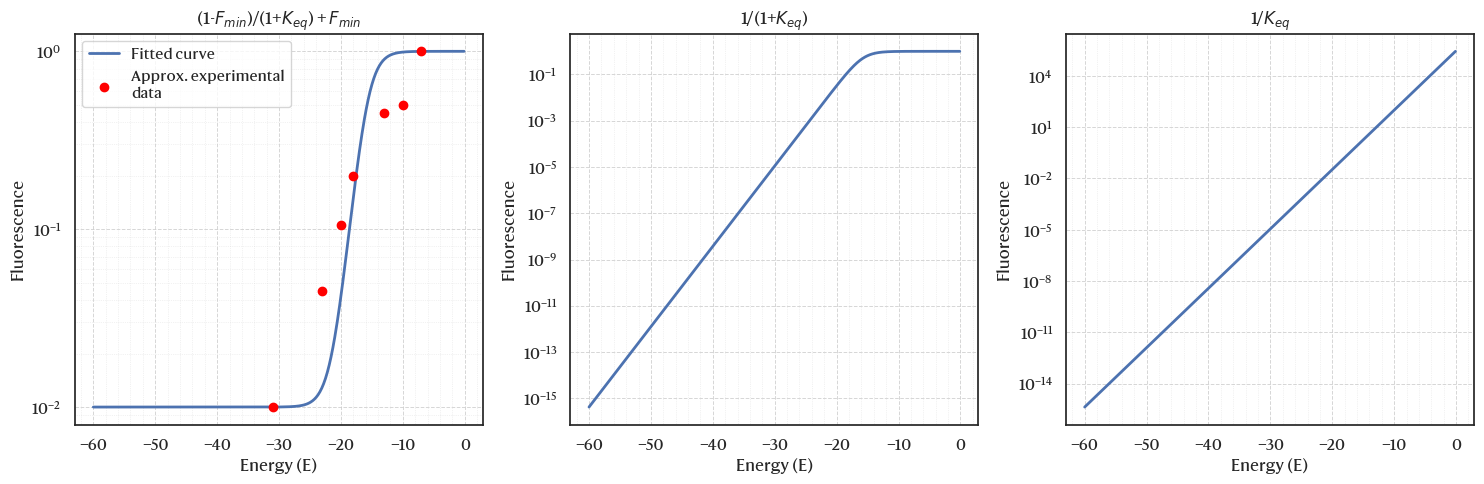

In [126]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, (fluor, label) in enumerate(zip([F_leaky, F, F2], ['(1-$F_{min}$)/(1+$K_{eq}$) + $F_{min}$', '1/(1+$K_{eq}$)', '1/$K_{eq}$'])):
    axs[i].plot(E, fluor, linewidth=2, label='Fitted curve')
    if i == 0:
        axs[i].scatter(chosen_points[0], chosen_points[1], color='red', zorder=5, label='Approx. experimental\ndata')
        axs[i].legend()
    axs[i].set_title(label)
    axs[i].set_xlabel('Energy (E)')
    axs[i].set_ylabel('Fluorescence')
    axs[i].set_yscale('log')

    axs[i].minorticks_on()
    # axs[i].grid(True, which='both', axis='both', linestyle='-') #, linewidth=0.7, alpha=0.8)
    axs[i].grid(True, which='major', axis='both', linestyle='--', linewidth=0.7, alpha=0.8)
    axs[i].grid(which='minor', axis='both', linestyle=':', linewidth=0.5, alpha=0.5)
    
# plt.suptitle('Comparison of approximate fluorescence fit\ncalculated using different methods')
plt.tight_layout()
plt.savefig(os.path.join(top_dir, 'fluorescence_comparison.png'), dpi=300)

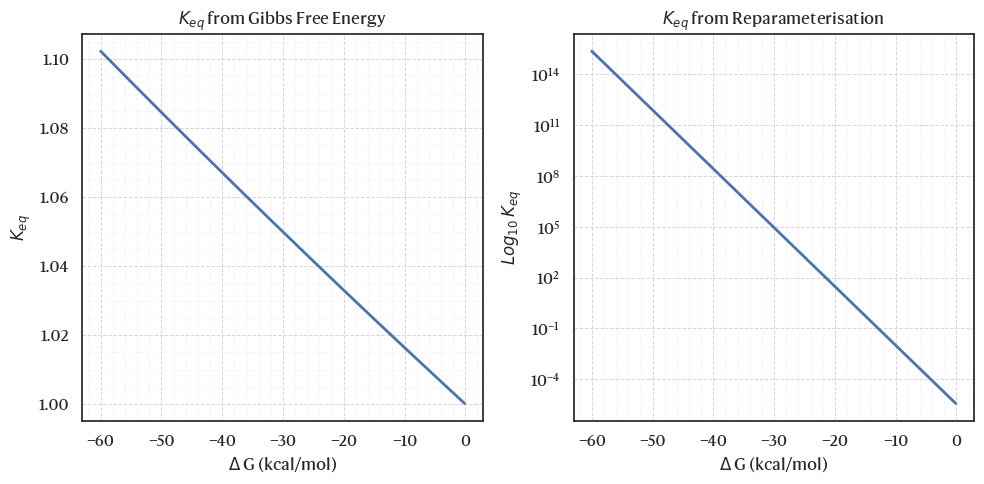

In [127]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(E, K_eq_gibbs, label='Gibbs', linewidth=2)
axs[0].set_xlabel('$\Delta$ G (kcal/mol)')
axs[0].set_ylabel('$K_{eq}$')
axs[0].set_title('$K_{eq}$ from Gibbs Free Energy')

axs[1].plot(E, K_eq_F, label='F', linewidth=2)
axs[1].set_xlabel('$\Delta$ G (kcal/mol)')
axs[1].set_ylabel('$Log_{10}$ $K_{eq}$')
axs[1].set_title('$K_{eq}$ from Reparameterisation')
axs[1].set_yscale('log')

for ax in axs:
    ax.minorticks_on()
    # ax.grid(True, which='both', axis='both', linestyle='-') #, linewidth=0.7, alpha=0.8)
    ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.7, alpha=0.8)
    ax.grid(which='minor', axis='both', linestyle=':', linewidth=0.5, alpha=0.5)
    
# plt.suptitle('Comparison of equilibrium constants calculated\nusing Gibbs free energy vs. reparameterisation')
plt.tight_layout()
plt.savefig(os.path.join(top_dir, 'equilibrium_constants_comparison.png'), dpi=300)